# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

denver = pd.read_csv('data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


This data contains `longitude` and `latitude` information but it is a csv file. Therefore we must **convert it to a geospatial data**.

In [2]:
from shapely.geometry import Point

denver_geometry = [Point(xy) for xy in zip(denver['Longitude'], denver['Latitude'])]

denver = gpd.GeoDataFrame(denver, crs="EPSG:4326", geometry=denver_geometry)
denver.drop(columns=['Longitude','Latitude'], inplace=True)
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,POINT (-105.05000 39.77000)
...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,POINT (-105.00000 39.75000)
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,POINT (-104.90000 39.76000)
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,POINT (-104.97000 39.74000)
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,POINT (-104.91000 39.65000)


In [3]:
neighborhoods = gpd.read_file('data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [4]:
census = pd.read_csv('data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


Our `neighborhoods` and `census` data contains information about the neighborhoods of Denver and both of them contains `NBHD_ID` column. So, we can **merge these data**.

In [5]:
neighborhoods = pd.merge(neighborhoods, census, on='NBHD_ID')
neighborhoods

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",Cole,4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",Sunnyside,9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0


Now, let's check their coordinate referance system (CRS). When working with geospatial data, it is so important that **their coordinate reference systems are defined and same**.

In [6]:
denver.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
neighborhoods.crs

Our `neighborhoods` data **has not a CRS**. So, we must define it ourselves!

In [8]:
neighborhoods.set_crs('EPSG:4326', inplace=True)

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",Cole,4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",Sunnyside,9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0


In [9]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We are working with **only Starbucks Coffee Shop in Denver**. Therefore, we should check to see if there's a coffee shop outside Denver.

In [10]:
denver = denver.clip(neighborhoods)
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,geometry
19,11474-105326,"Hampden & Locust, Denver",303 691-3437,6395 E. Hampden Ave.,NaN,NaN,802227602,POINT (-104.92000 39.65000)
55,11034-104012,Hampden & Dayton - Denver,303 369-5081,9925 East Hampden Ave,NaN,NaN,802314903,POINT (-104.87000 39.65000)
8,18946-177247,Target Denver T-2820,303-481-2821,7777 E. Hampden Ave,NaN,NaN,80231,POINT (-104.90000 39.65000)
64,6225-283,Hampden & Happy Canyon,(303) 639-3102,5074 E. Hampden Avenue,NaN,NaN,802227329,POINT (-104.93000 39.65000)
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,POINT (-104.91000 39.65000)
...,...,...,...,...,...,...,...,...
61,76470-97550,SuperTarget Denver/Stapltn ST-2052,303-209-8720,7930 E 49th Ave,NaN,NaN,802071709,POINT (-104.90000 39.78000)
35,10625-100287,45th & Peoria-Denver,303-371-0089,4505 Peoria Street,NaN,NaN,802394848,POINT (-104.85000 39.78000)
58,10436-98953,I-70 & I-270- Stapleton,303-371-1503,7990 E. 49th Avenue,NaN,NaN,802071709,POINT (-104.90000 39.79000)
37,75960-108269,DEN B RJ Term South Finger Lower,303-342-6655,HMSHost 8500 Pena Blvd,NaN,NaN,80249,POINT (-104.67000 39.86000)


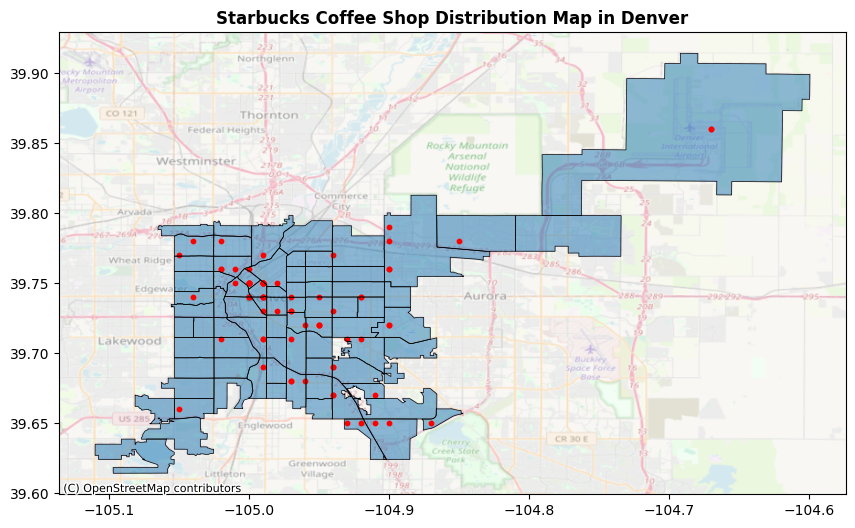

In [11]:
import contextily as cx

fig, ax = plt.subplots(figsize=[12,6])
boroughs_names = neighborhoods.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
neighborhoods_plot = neighborhoods.plot(ax=ax, alpha=0.5)
denver_plot = denver.plot(ax=ax, color='red', markersize=10)
plt.title('Starbucks Coffee Shop Distribution Map in Denver', weight='bold')

cx.add_basemap(neighborhoods_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.5);

- How many coffees does it have in different neighborhoods in Denver?

In [12]:
joined = gpd.sjoin(denver, neighborhoods, how="inner", predicate="within")
coffee_count = pd.DataFrame(joined.groupby('NBHD_ID').size(), columns=['Coffee_Count']).reset_index()
coffee_count

,NBHD_ID,Coffee_Count
0,1,1
1,2,1
2,3,2
3,8,2
4,9,1
5,10,7
6,12,3
7,13,3
8,16,5
9,20,1


In [13]:
neighborhoods = pd.merge(neighborhoods, coffee_count, on='NBHD_ID', how='left')
neighborhoods['Coffee_Count'] = neighborhoods['Coffee_Count'].fillna(0)
neighborhoods

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Coffee_Count
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN,1.0
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN,0.0
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN,0.0
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0,1.0
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN,0.0
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",Cole,4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN,0.0
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.0
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",Sunnyside,9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0,1.0


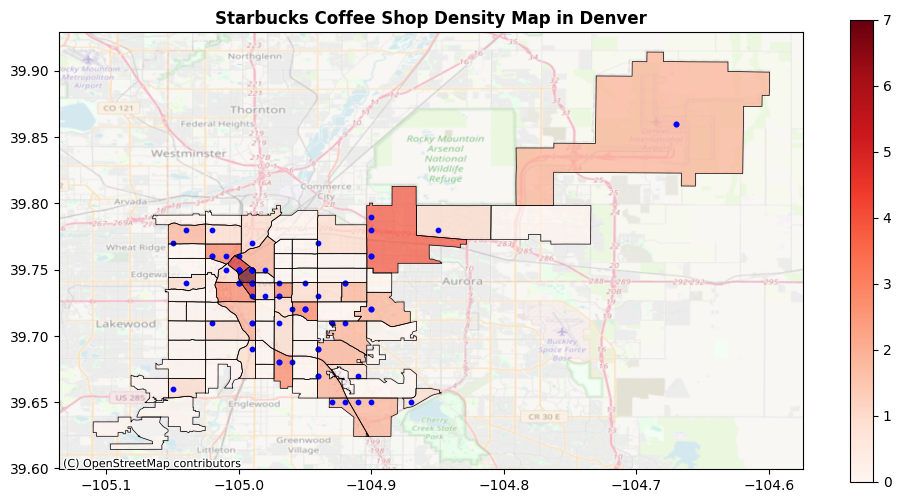

In [14]:
import contextily as cx

fig, ax = plt.subplots(figsize=[12,6])
boroughs_names = neighborhoods.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
neighborhoods_plot = neighborhoods.plot('Coffee_Count', ax=ax, alpha=0.7, legend=True, cmap='Reds')
denver_plot = denver.plot(ax=ax, color='blue', markersize=10)
plt.title('Starbucks Coffee Shop Density Map in Denver', weight='bold')

cx.add_basemap(neighborhoods_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.5);

We all know that **people in 18-34 are more likely to go a coffee** than other age groups.

- What about the ages distribution?

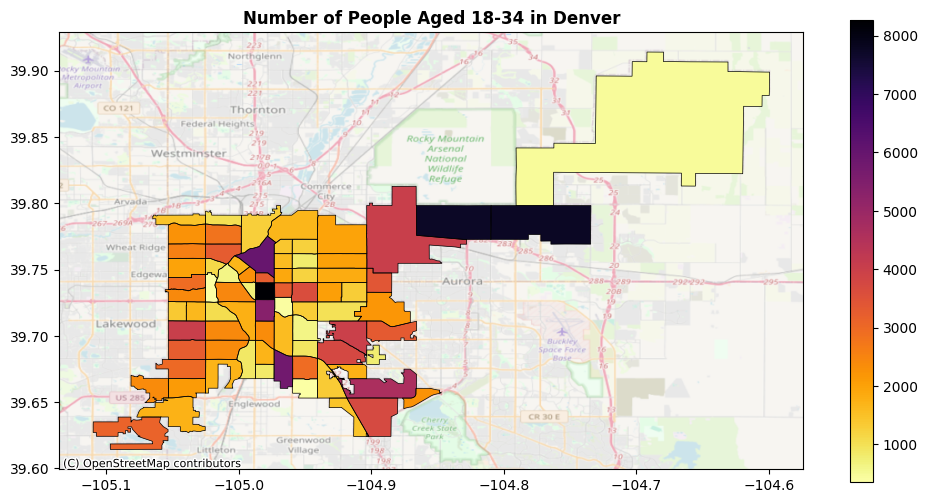

In [15]:
fig, ax = plt.subplots(figsize=[12,6])
neighborhoods_boundary = neighborhoods.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
neighborhoods_age_plot = neighborhoods.plot('AGE_18_TO_34', ax=ax, legend=True, cmap='inferno_r')
plt.title('Number of People Aged 18-34 in Denver', weight='bold')

cx.add_basemap(neighborhoods_age_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.6);

To find the coffee density across neigborhoods, we can divide the **number of coffee shops** by the **number of people between 18-34**.

In [16]:
neighborhoods['Coffee_Density'] = neighborhoods['Coffee_Count'] / neighborhoods['AGE_18_TO_34']
neighborhoods

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Coffee_Count,Coffee_Density
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN,1.0,0.001575
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN,0.0,0.000000
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN,0.0,0.000000
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0,1.0,0.000629
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN,0.0,0.000000
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",Cole,4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN,0.0,0.000000
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.0,0.000000
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",Sunnyside,9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0,1.0,0.000353


In [17]:
neighborhoods['Coffee_Density'].describe()

count    78.000000
mean      0.000565
std       0.001099
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000616
max       0.006974
Name: Coffee_Density, dtype: float64

For more easily interpret these numbers, we can **normalize them in the range 0-1**.

In [18]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

normalized_density = min_max_normalize(neighborhoods['Coffee_Density'])
neighborhoods['Coffee_Density'] = normalized_density
neighborhoods

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Coffee_Count,Coffee_Density
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN,1.0,0.225827
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN,0.0,0.000000
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN,0.0,0.000000
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0,1.0,0.090245
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN,0.0,0.000000
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",Cole,4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN,0.0,0.000000
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.0,0.000000
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",Sunnyside,9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0,1.0,0.050689


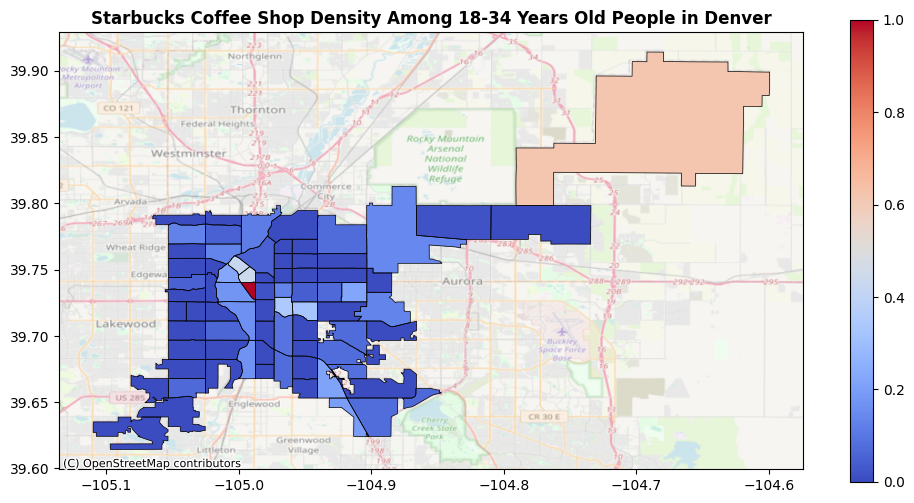

In [19]:
fig, ax = plt.subplots(figsize=[12,6])
neighborhoods_boundary = neighborhoods.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
neighborhoods_density_plot = neighborhoods.plot('Coffee_Density', ax=ax, legend=True, cmap='coolwarm')
plt.title('Starbucks Coffee Shop Density Among 18-34 Years Old People in Denver', weight='bold')

cx.add_basemap(neighborhoods_density_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.6);

Lastly, let's put all this information together.

In [20]:
non_coffee_18_34 = neighborhoods[neighborhoods['Coffee_Density']==0].sort_values('AGE_18_TO_34', ascending=False)
non_coffee_18_34.head(10)

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Coffee_Count,Coffee_Density
53,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",Gateway - Green Valley Ranch,29201.0,10074.0,7778.0,10405.0,944.0,9427.0,7056.0,2192.0,0.0,0.0
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",Speer,10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.0,0.0
36,32,Hampden,"POLYGON ((-104.86602 39.66027, -104.86633 39.6...",Hampden,17547.0,2754.0,4655.0,6957.0,3181.0,9320.0,4105.0,2160.0,0.0,0.0
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.0,0.0
44,24,East Colfax,"POLYGON ((-104.88466 39.74746, -104.88465 39.7...",East Colfax,10191.0,2595.0,3397.0,3640.0,559.0,4273.0,2106.0,442.0,0.0,0.0
64,78,Windsor,"POLYGON ((-104.89678 39.69660, -104.89682 39.6...",Windsor,12589.0,1819.0,3302.0,4085.0,3383.0,7204.0,2590.0,723.0,0.0,0.0
43,43,Mar Lee,"POLYGON ((-105.02506 39.69675, -105.02507 39.6...",Mar Lee,12452.0,3685.0,3256.0,4289.0,1222.0,3973.0,2771.0,413.0,0.0,0.0
46,47,North Capitol Hill,"POLYGON ((-104.97338 39.74378, -104.97339 39.7...",North Capitol Hill,5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.0,0.0
10,44,Marston,"POLYGON ((-105.06507 39.61852, -105.06509 39.6...",Marston,11132.0,2266.0,3119.0,4553.0,1194.0,5206.0,2821.0,1164.0,0.0,0.0
42,34,Harvey Park,"POLYGON ((-105.02511 39.66772, -105.02605 39.6...",Harvey Park,11525.0,3162.0,3005.0,4107.0,1251.0,3990.0,2772.0,476.0,0.0,0.0


/var/folders/5q/z3mk3kqj0d77y0jhx_gdsrtm0000gn/T/ipykernel_12793/724031884.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  non_coffee_18_34_centroid = non_coffee_18_34.head().geometry.centroid.plot(ax=ax, markersize=10, color='black')
/var/folders/5q/z3mk3kqj0d77y0jhx_gdsrtm0000gn/T/ipykernel_12793/724031884.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(non_coffee_18_34.head().geometry.centroid.x, non_coffee_18_34.head().geometry.centroid.y, non_coffee_18_34.head()['NBHD_NAME_x']):


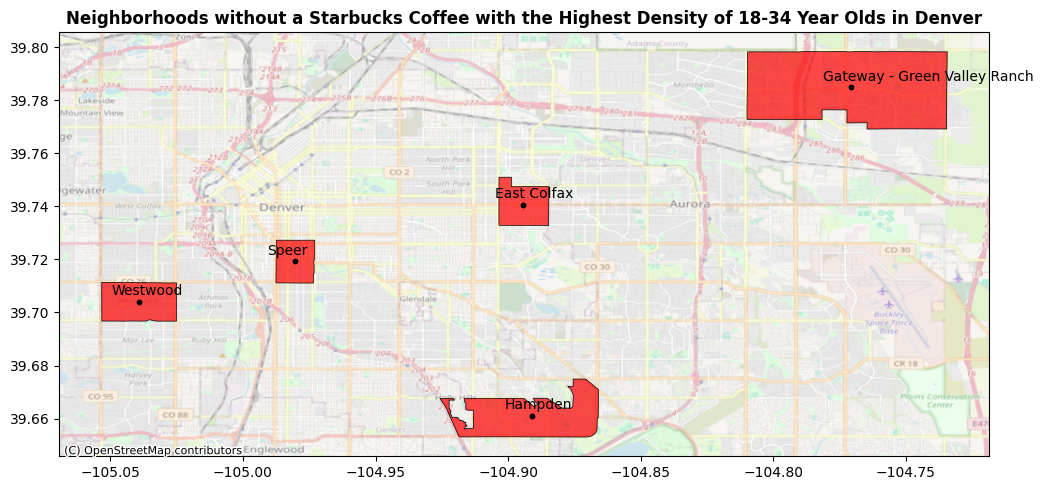

In [21]:
fig, ax = plt.subplots(figsize=[12,6])
non_coffee_18_34_boundary = non_coffee_18_34.head().geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
non_coffee_18_34_plot = non_coffee_18_34.head().plot(ax=ax, color='red', alpha=0.7)
non_coffee_18_34_centroid = non_coffee_18_34.head().geometry.centroid.plot(ax=ax, markersize=10, color='black')
plt.title('Neighborhoods without a Starbucks Coffee with the Highest Density of 18-34 Year Olds in Denver', weight='bold')

for x, y, label in zip(non_coffee_18_34.head().geometry.centroid.x, non_coffee_18_34.head().geometry.centroid.y, non_coffee_18_34.head()['NBHD_NAME_x']):
    non_coffee_18_34_boundary.annotate(label, xy=(x, y), xytext=(-20, 5), textcoords="offset points", fontsize=10)

cx.add_basemap(non_coffee_18_34_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.6);

In [22]:
non_coffee_population = neighborhoods[neighborhoods['Coffee_Density']==0].sort_values('POPULATION_2010', ascending=False)
non_coffee_population.head(10)

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,Coffee_Count,Coffee_Density
53,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",Gateway - Green Valley Ranch,29201.0,10074.0,7778.0,10405.0,944.0,9427.0,7056.0,2192.0,0.0,0.0
36,32,Hampden,"POLYGON ((-104.86602 39.66027, -104.86633 39.6...",Hampden,17547.0,2754.0,4655.0,6957.0,3181.0,9320.0,4105.0,2160.0,0.0,0.0
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.0,0.0
64,78,Windsor,"POLYGON ((-104.89678 39.69660, -104.89682 39.6...",Windsor,12589.0,1819.0,3302.0,4085.0,3383.0,7204.0,2590.0,723.0,0.0,0.0
43,43,Mar Lee,"POLYGON ((-105.02506 39.69675, -105.02507 39.6...",Mar Lee,12452.0,3685.0,3256.0,4289.0,1222.0,3973.0,2771.0,413.0,0.0,0.0
42,34,Harvey Park,"POLYGON ((-105.02511 39.66772, -105.02605 39.6...",Harvey Park,11525.0,3162.0,3005.0,4107.0,1251.0,3990.0,2772.0,476.0,0.0,0.0
10,44,Marston,"POLYGON ((-105.06507 39.61852, -105.06509 39.6...",Marston,11132.0,2266.0,3119.0,4553.0,1194.0,5206.0,2821.0,1164.0,0.0,0.0
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",Speer,10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.0,0.0
44,24,East Colfax,"POLYGON ((-104.88466 39.74746, -104.88465 39.7...",East Colfax,10191.0,2595.0,3397.0,3640.0,559.0,4273.0,2106.0,442.0,0.0,0.0
34,54,Ruby Hill,"POLYGON ((-104.99238 39.69666, -104.99239 39.6...",Ruby Hill,9820.0,2865.0,2397.0,3440.0,1118.0,3324.0,2146.0,364.0,0.0,0.0


/var/folders/5q/z3mk3kqj0d77y0jhx_gdsrtm0000gn/T/ipykernel_12793/1594258062.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  non_coffee_population_centroid = non_coffee_population.head().geometry.centroid.plot(ax=ax, markersize=10, color='black')
/var/folders/5q/z3mk3kqj0d77y0jhx_gdsrtm0000gn/T/ipykernel_12793/1594258062.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(non_coffee_population.head().geometry.centroid.x, non_coffee_population.head().geometry.centroid.y, non_coffee_population.head()['NBHD_NAME_x']):


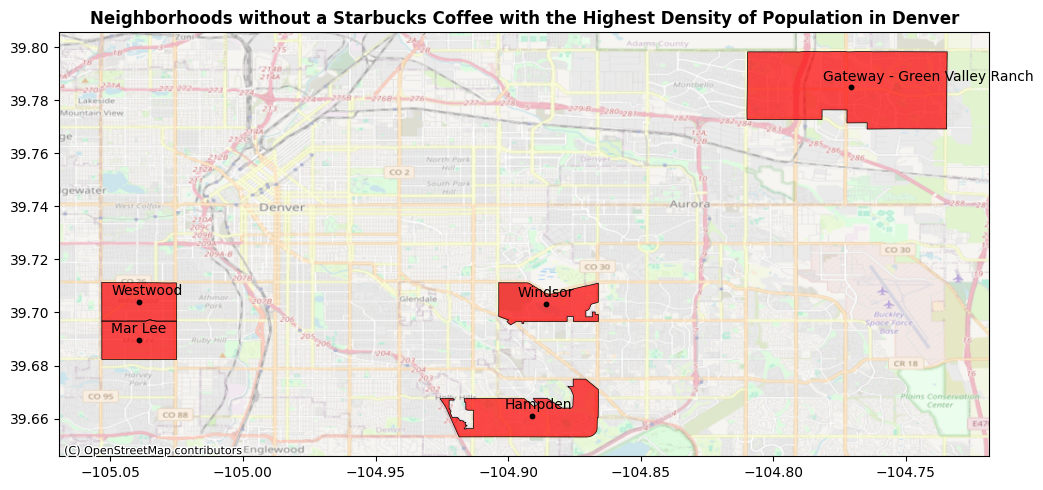

In [23]:
fig, ax = plt.subplots(figsize=[12,6])
non_coffee_population_boundary = non_coffee_population.head().geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)
non_coffee_population_plot = non_coffee_population.head().plot(ax=ax, color='red', alpha=0.7)
non_coffee_population_centroid = non_coffee_population.head().geometry.centroid.plot(ax=ax, markersize=10, color='black')
plt.title('Neighborhoods without a Starbucks Coffee with the Highest Density of Population in Denver', weight='bold')

for x, y, label in zip(non_coffee_population.head().geometry.centroid.x, non_coffee_population.head().geometry.centroid.y, non_coffee_population.head()['NBHD_NAME_x']):
    non_coffee_population_boundary.annotate(label, xy=(x, y), xytext=(-20, 5), textcoords="offset points", fontsize=10)

cx.add_basemap(non_coffee_population_plot, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.6);